In [1]:
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn
!pip install skl2onnx
!pip install onnxruntime

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import datetime
import time
from scipy.fftpack import fft
from scipy.signal import welch
from datetime import datetime
from datetime import timedelta
from numpy import diff
from decimal import Decimal, getcontext
from scipy.signal import find_peaks

%matplotlib inline
plt.style.use('ggplot')

In [3]:
my_file = open("C:\\Users\\hjk0811\\Downloads\\feature1\\feature.txt", "r")
totalFeaturee = []
for line in my_file:
    totalFeaturee.extend([float(i) for i in line.split()])
    


totalFeature=np.array([])
for i in range(len(totalFeaturee)):
    totalFeature=np.append(totalFeature,totalFeaturee[i])
x = int(len(totalFeature)/129)
totalFeature = totalFeature.reshape(x, 129)
np.set_printoptions(suppress=True)
print(totalFeature)

[[     1.              0.0440775       1.         ... -15341.3533188
   -4413.5139832   41560.03752677]
 [     2.              0.02453709      2.         ...  -1822.48373356
   45617.31821995   1207.70724508]
 [     1.              0.03554647      0.         ...  -8183.80194722
    6728.23056225 -12585.29972511]
 ...
 [     1.              0.04774323      1.         ...   4601.8570446
   20406.03405844  20057.03919667]
 [     0.              0.00769195      3.         ...  -9419.46065721
    6453.31435993   -951.76939835]
 [     0.              0.0050816       0.         ...  21643.6660071
    1023.97587035  -1269.6769588 ]]


In [4]:
my_file = open("C:\\Users\\hjk0811\\Downloads\\feature1\\label.txt", "r")
totalLable = []
for line in my_file:
    totalLable.extend([float(i) for i in line.split()])
    
totalLable=np.asarray(totalLable).astype(int)
totalLable = totalLable.reshape(x, 1) 

totalLable = totalLable.reshape(1,x) 
totalLable = totalLable.flatten()

print(totalLable) 

[ 1  1  1  1  1 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 11 11 11 12 12 12 12 12 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 15 15 15 15 15  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  6  6  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  9  9  9  9]


In [5]:
columnNames=['1','2','3']
for i in range(4,130):
  columnNames.append(str(i))

print(columnNames)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129']


In [6]:
df = pd.DataFrame(totalFeature, columns = columnNames)

In [7]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,120,121,122,123,124,125,126,127,128,129
0,1.0,0.044077,1.0,0.041169,1.0,0.033000,1.0,0.026685,1.0,0.028808,...,0.012973,0.007351,1.184261e-02,0.009127,0.009132,0.007816,0.009006,-15341.353319,-4413.513983,41560.037527
1,2.0,0.024537,2.0,0.042026,2.0,0.009387,1.0,0.004651,1.0,0.025020,...,0.031675,0.004881,7.576224e-03,0.000499,0.000050,0.002791,0.009023,-1822.483734,45617.318220,1207.707245
2,1.0,0.035546,0.0,0.000600,1.0,0.034716,1.0,0.015709,1.0,0.021109,...,0.028359,0.012269,3.604302e-07,0.014554,0.004899,0.008797,0.019044,-8183.801947,6728.230562,-12585.299725
3,2.0,0.008966,1.0,0.041194,1.0,0.012014,3.0,0.026286,1.0,0.010697,...,0.011094,0.001026,1.602504e-02,0.000480,0.035177,0.000410,0.045863,-28657.887161,-21242.160113,-49104.022378
4,2.0,0.033230,1.0,0.040996,1.0,0.028153,2.0,0.033730,1.0,0.023253,...,0.066298,0.008602,1.112942e-02,0.012690,0.026671,0.010294,0.008014,-32115.701853,32967.761368,-2465.159538


In [8]:
N = 3
# Select last N columns of dataframe
last_n_column  = df.iloc[: , -N:]
print(last_n_column)

N = 120
# Select first N columns
first_n_column  = df.iloc[: , :N]

              127           128           129
0   -15341.353319  -4413.513983  41560.037527
1    -1822.483734  45617.318220   1207.707245
2    -8183.801947   6728.230562 -12585.299725
3   -28657.887161 -21242.160113 -49104.022378
4   -32115.701853  32967.761368  -2465.159538
..            ...           ...           ...
175  -2219.860081 -22098.123300 -21463.258495
176 -32895.315995   1161.172467  47443.375774
177   4601.857045  20406.034058  20057.039197
178  -9419.460657   6453.314360   -951.769398
179  21643.666007   1023.975870  -1269.676959

[180 rows x 3 columns]


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(last_n_column, totalLable, test_size=0.3, shuffle=True)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
#from sklearn.linear_model import LogisticRegression
clf = RandomForestClassifier(n_estimators=1000, max_depth=3)
#clf = LogisticRegression(random_state=0).fit(X_train, Y_train.ravel())
clf.fit(X_train, Y_train.ravel())
print("Accuracy on training set is : {}".format(clf.score(X_train, Y_train)))
print("Accuracy on test set is : {}".format(clf.score(X_test, Y_test)))
Y_test_pred = clf.predict(X_test)
print(classification_report(Y_test, Y_test_pred))

print(Y_test_pred)
print(Y_test)

Accuracy on training set is : 0.42063492063492064
Accuracy on test set is : 0.14814814814814814
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.50      0.17      0.25         6
           4       0.17      0.10      0.12        10
           5       0.17      0.56      0.26         9
           7       0.00      0.00      0.00         6
           8       0.06      0.17      0.09         6
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         6

    accuracy                           0.15        54
   macro avg       0.08      0.09      0.07        54
weighted avg       0.12      0.15      0.10        54

[5 5 5 5 8 8 5 4 5 8 8 5 5 5 2 8 5 8 5 5 8 8 8 5 5 5 5 4 5 8 5 4 8 4 5 8 8
 5 8 5 5 5 5 8 5

C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df, totalLable, test_size=0.3, shuffle=True)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
#from sklearn.linear_model import LogisticRegression
clf = RandomForestClassifier(n_estimators=1000, max_depth=3)
#clf = LogisticRegression(random_state=0).fit(X_train, Y_train.ravel())
clf.fit(X_train, Y_train.ravel())
print("Accuracy on training set is : {}".format(clf.score(X_train, Y_train)))
print("Accuracy on test set is : {}".format(clf.score(X_test, Y_test)))
Y_test_pred = clf.predict(X_test)
print(classification_report(Y_test, Y_test_pred))

print(Y_test_pred)
print(Y_test)

Accuracy on training set is : 0.7222222222222222
Accuracy on test set is : 0.2222222222222222
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       1.00      0.25      0.40         4
           3       0.00      0.00      0.00         2
           4       0.08      0.17      0.11         6
           5       0.27      0.55      0.36        11
           7       0.33      0.25      0.29         4
           8       0.17      0.11      0.13         9
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          14       0.22      0.67      0.33         3
          15       0.00      0.00      0.00         2

    accuracy                           0.22        54
   macro avg       0.15      0.14      0

C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
from joblib import Parallel, delayed
import joblib

# Save the model as a pickle in a file
joblib.dump(clf, 'feature129.pkl')
  
# Load the model from the file
clf_from_joblib = joblib.load('feature129.pkl')
  
# Use the loaded model to make predictions
clf_from_joblib.predict(X_test)

array([ 5,  4, 14,  7,  5,  5,  7,  5, 14, 14,  5,  5,  4,  5,  8,  2, 14,
        4, 14,  4,  4,  5,  4,  4,  5,  4,  8,  4,  5,  4,  5,  5,  8,  5,
        5,  4,  5, 14,  5, 14,  5,  4,  5,  8,  5, 14,  5, 14,  5,  5,  8,
        8,  4,  7])

In [14]:
# from sklearn.inspection import permutation_importance
# importances = clf.feature_importances_

# totalLable = totalLable.reshape(1, x) 
# totalLable = totalLable.flatten()
# myList = list(range(1, ))
# forest_importances = pd.Series(importances, index=myList)
# std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

# fig, ax = plt.subplots()
# forest_importances.plot.bar(yerr=std, ax=ax)
# ax.set_title("Feature importances using MDI")
# ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()

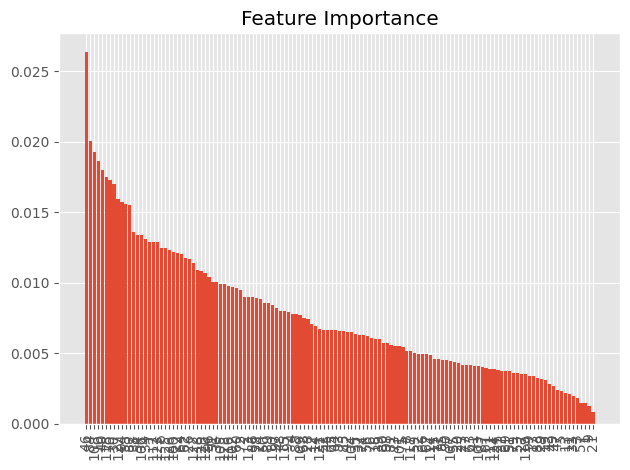

In [15]:
importances = clf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), df.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [16]:
importances[sorted_indices][0:20]

array([0.02635272, 0.02006277, 0.01923136, 0.01863023, 0.01800833,
       0.01746091, 0.01725957, 0.01696713, 0.01595463, 0.01572593,
       0.01554441, 0.01552832, 0.0136182 , 0.01335797, 0.01334219,
       0.0131084 , 0.01290438, 0.0128756 , 0.01285166, 0.01243367])

In [17]:
df.columns[sorted_indices][0:20]

Index(['46', '84', '108', '10', '40', '118', '70', '30', '127', '94', '58',
       '82', '38', '54', '106', '34', '7', '112', '123', '6'],
      dtype='object')

In [18]:
df2 = df[df.columns[sorted_indices][0:20]]

In [19]:
df2

,46,84,108,10,40,118,70,30,127,94,58,82,38,54,106,34,7,112,123,6
0,0.150125,0.015352,0.017651,0.028808,0.064408,0.015821,0.063846,0.019359,-15341.353319,0.015821,0.025934,0.016351,1.911607e-02,0.024993,0.013509,0.023824,1.0,0.030315,9.126889e-03,0.033000
1,0.034733,0.022570,0.015072,0.025020,0.022818,0.032984,0.032984,0.002864,-1822.483734,0.032984,0.009928,0.009310,4.354125e-02,0.002009,0.009492,0.010089,1.0,0.003140,4.992152e-04,0.009387
2,0.095008,0.016292,0.022305,0.021109,0.000000,0.029766,0.027669,0.027394,-8183.801947,0.029786,0.025719,0.016316,1.916030e-02,0.035468,0.015252,0.020247,1.0,0.000000,1.455419e-02,0.034716
3,0.043307,0.025854,0.020789,0.010697,0.059360,0.043307,0.043307,0.002850,-28657.887161,0.043307,0.003355,0.003355,3.298740e-02,0.002850,0.003355,0.003355,3.0,0.035283,4.800356e-04,0.012014
4,0.038427,0.021975,0.018237,0.023253,0.080188,0.025660,0.042849,0.023142,-32115.701853,0.026922,0.020603,0.017166,1.855390e-02,0.017791,0.029829,0.024635,2.0,0.015608,1.268954e-02,0.028153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.012243,0.007845,0.008791,0.010850,0.002565,0.012243,0.012243,0.023607,-2219.860081,0.012243,0.004386,0.005520,1.705575e-02,0.021602,0.004386,0.006179,1.0,0.002565,8.243405e-03,0.014754
176,0.000711,0.007038,0.007038,0.005323,0.026230,0.000711,0.000711,0.014417,-32895.315995,0.000711,0.004127,0.004127,1.804935e-03,0.023220,0.004127,0.004127,4.0,0.002770,6.478148e-03,0.022563
177,0.047963,0.019786,0.018133,0.028001,0.102655,0.082917,0.059293,0.054581,4601.857045,0.080940,0.020531,0.023519,3.930242e-02,0.032200,0.023486,0.020236,1.0,0.014662,1.459475e-02,0.023984
178,0.009862,0.007329,0.008424,0.010428,0.000183,0.010475,0.010475,0.000816,-9419.460657,0.010475,0.010193,0.012329,7.700621e-06,0.000816,0.007771,0.008391,3.0,0.000183,7.578574e-07,0.000816


In [20]:
df2['label'] = totalLable

C:\Users\hjk0811\AppData\Local\Temp\ipykernel_16948\1665477033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['label'] = totalLable


In [21]:
df2

,46,84,108,10,40,118,70,30,127,94,...,82,38,54,106,34,7,112,123,6,label
0,0.150125,0.015352,0.017651,0.028808,0.064408,0.015821,0.063846,0.019359,-15341.353319,0.015821,...,0.016351,1.911607e-02,0.024993,0.013509,0.023824,1.0,0.030315,9.126889e-03,0.033000,1
1,0.034733,0.022570,0.015072,0.025020,0.022818,0.032984,0.032984,0.002864,-1822.483734,0.032984,...,0.009310,4.354125e-02,0.002009,0.009492,0.010089,1.0,0.003140,4.992152e-04,0.009387,1
2,0.095008,0.016292,0.022305,0.021109,0.000000,0.029766,0.027669,0.027394,-8183.801947,0.029786,...,0.016316,1.916030e-02,0.035468,0.015252,0.020247,1.0,0.000000,1.455419e-02,0.034716,1
3,0.043307,0.025854,0.020789,0.010697,0.059360,0.043307,0.043307,0.002850,-28657.887161,0.043307,...,0.003355,3.298740e-02,0.002850,0.003355,0.003355,3.0,0.035283,4.800356e-04,0.012014,1
4,0.038427,0.021975,0.018237,0.023253,0.080188,0.025660,0.042849,0.023142,-32115.701853,0.026922,...,0.017166,1.855390e-02,0.017791,0.029829,0.024635,2.0,0.015608,1.268954e-02,0.028153,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.012243,0.007845,0.008791,0.010850,0.002565,0.012243,0.012243,0.023607,-2219.860081,0.012243,...,0.005520,1.705575e-02,0.021602,0.004386,0.006179,1.0,0.002565,8.243405e-03,0.014754,8
176,0.000711,0.007038,0.007038,0.005323,0.026230,0.000711,0.000711,0.014417,-32895.315995,0.000711,...,0.004127,1.804935e-03,0.023220,0.004127,0.004127,4.0,0.002770,6.478148e-03,0.022563,9
177,0.047963,0.019786,0.018133,0.028001,0.102655,0.082917,0.059293,0.054581,4601.857045,0.080940,...,0.023519,3.930242e-02,0.032200,0.023486,0.020236,1.0,0.014662,1.459475e-02,0.023984,9
178,0.009862,0.007329,0.008424,0.010428,0.000183,0.010475,0.010475,0.000816,-9419.460657,0.010475,...,0.012329,7.700621e-06,0.000816,0.007771,0.008391,3.0,0.000183,7.578574e-07,0.000816,9


In [22]:
x = df2.drop("label", axis=1)
y = df2['label'].astype(int).values

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, shuffle=True)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
#from sklearn.linear_model import LogisticRegression
clf = RandomForestClassifier(n_estimators=1000, max_depth=3)
#clf = LogisticRegression(random_state=0).fit(X_train, Y_train.ravel())
clf.fit(X_train, Y_train.ravel())
print("Accuracy on training set is : {}".format(clf.score(X_train, Y_train)))
print("Accuracy on test set is : {}".format(clf.score(X_test, Y_test)))
Y_test_pred = clf.predict(X_test)
print(classification_report(Y_test, Y_test_pred))

print(Y_test_pred)
print(Y_test)

Accuracy on training set is : 0.6825396825396826
Accuracy on test set is : 0.2037037037037037
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       1.00      0.33      0.50         6
           3       0.00      0.00      0.00         3
           4       0.18      0.33      0.24         6
           5       0.27      0.25      0.26        12
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.18      0.50      0.26         6
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.09      0.50      0.15         2
          15       0.00      0.00      0.00         1

    accuracy                           0

C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [26]:
clf = neighbors.KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
misclassified = np.sum(cm) - np.sum(np.diag(cm))
print(cm)
print(misclassified)
print(classification_report(Y_test, y_pred))

[[0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 3 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 2 2 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 7 2 0 2 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 3 0 2 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 2 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]]
47
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.18      0.50      0.26         6
           3       0.00      0.00      0.00         3
           4       0.14      0.33      0.20         6
           5       0.17      0.17      0.17        12
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         6
           9  

C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
misclassified = np.sum(cm) - np.sum(np.diag(cm))
print(cm)
print(misclassified)
print(classification_report(Y_test, y_pred))

[[0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 3 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 2 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 5 2 0 1 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 2 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 2 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]]
49
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.17      0.50      0.25         6
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         6
           5       0.14      0.17      0.15        12
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         6
           9  

C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()
cls.fit(X_train,Y_train)
y_pred = cls.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
misclassified = np.sum(cm) - np.sum(np.diag(cm))
print(cm)
print(misclassified)
print(classification_report(Y_test, y_pred))

[[0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 0 8 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 2 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]]
51
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         6
           9  

C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
clf = neighbors.KNeighborsClassifier(n_neighbors=15)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
misclassified = np.sum(cm) - np.sum(np.diag(cm))
print(cm)
print(misclassified)
print(classification_report(Y_test, y_pred))

[[0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 2 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 2 2 0 0 2 0 0 0 0 0 0 0]
 [0 2 0 0 6 0 2 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 1 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 2 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 2 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]]
43
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.25      0.50      0.33         6
           3       0.00      0.00      0.00         3
           4       0.25      0.33      0.29         6
           5       0.26      0.50      0.34        12
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         6
           9  

C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics

In [31]:
pipe = make_pipeline(StandardScaler(), SVC(kernel='linear'))
pipe.fit(X_train, Y_train)  # apply scaling on training data

pipe.score(X_test, Y_test)  # apply scaling on testing data, without leaking training data.
y_pred = pipe.predict(X_test)
cm=confusion_matrix(Y_test, y_pred)
misclassified = np.sum(cm) - np.sum(np.diag(cm))
print(cm)
print(misclassified)
print(classification_report(Y_test, y_pred))

[[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 2 0 0 0 0 0 1 0 0 1 0 0 1 0]
 [0 0 0 1 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 1 0 0 1 1 1 0 0]
 [1 2 0 1 2 0 1 1 0 0 0 0 1 2 1]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 2 0 1 0 1 0 0 0]
 [0 0 0 0 1 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 2 1 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]
46
              precision    recall  f1-score   support

           1       0.25      0.50      0.33         2
           2       0.40      0.33      0.36         6
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         6
           5       0.15      0.17      0.16        12
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.29      0.33      0.31         6
           9  

C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
pipe = make_pipeline(StandardScaler(), SVC(kernel='poly'))
pipe.fit(X_train, Y_train)  # apply scaling on training data


pipe.score(X_test, Y_test)  # apply scaling on testing data, without leaking training data.
y_pred = pipe.predict(X_test)
cm=confusion_matrix(Y_test, y_pred)
print("Confusion Matrix: ")
print(cm)
print("Accuracy: ",metrics.accuracy_score(Y_test,y_pred))
print("f1 Score: ",f1_score(Y_test, y_pred, average='macro'))
print("Precision: ",precision_score(Y_test, y_pred, average='macro'))

Confusion Matrix: 
[[ 0  0  0  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  2  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]]
Accuracy:  0.2037037037037037
f1 Score:  0.024444444444444442
Precision:  0.015277777777777777


C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
pipe = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
pipe.fit(X_train, Y_train)  # apply scaling on training data


pipe.score(X_test, Y_test)  # apply scaling on testing data, without leaking training data.
y_pred = pipe.predict(X_test)
cm=confusion_matrix(Y_test, y_pred)
print("Confusion Matrix: ")
print(cm)
print("Accuracy: ",metrics.accuracy_score(Y_test,y_pred))
print("f1 Score: ",f1_score(Y_test, y_pred, average='macro'))
print("Precision: ",precision_score(Y_test, y_pred, average='macro'))

Confusion Matrix: 
[[0 0 0 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 3 0 0 0 0 0 1 0]
 [0 0 0 1 1 0 1 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 3 0 0 0 0 0 1 0]
 [0 1 0 1 3 0 0 4 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 2 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 1 0 0 0 0 0 1 0]
 [0 1 0 1 0 0 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]
Accuracy:  0.2037037037037037
f1 Score:  0.0806559714795009
Precision:  0.07292397660818713


C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini',max_depth=6,ccp_alpha=0.0)
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
cm=confusion_matrix(Y_test, y_pred)
print("Confusion Matrix: ")
print(cm)
print("Accuracy: ",metrics.accuracy_score(Y_test,y_pred))
print("f1 Score: ",f1_score(Y_test, y_pred, average='macro'))
print("Precision: ",precision_score(Y_test, y_pred, average='macro'))

Confusion Matrix: 
[[1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 2 0 2 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 1 0 0 0 0 0 0 0 0]
 [0 1 1 2 0 0 1 0 0 0 1 0 0 0 0]
 [1 0 0 2 0 0 5 0 0 0 1 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 2 1 0 0 0 0 1 0 0]
 [0 0 0 2 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]
Accuracy:  0.1111111111111111
f1 Score:  0.08098765432098766
Precision:  0.09523809523809525


C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [36]:
# regr = make_pipeline(StandardScaler(), SVR(kernel='linear',C=1.0, epsilon=0.2))
# regr.fit(X_train, Y_train)
# y_pred = regr.predict(X_test)
# print("prediction: ",y_pred)
# scorer = make_scorer(mean_squared_error, greater_is_better=False)
# param = {'C' : [1,5,10],'gamma' : ('auto','scale')}
# search = GridSearchCV(SVR(kernel='linear', epsilon=0.2),
#                       param_grid=param, cv=3, scoring=scorer, n_jobs = -1, verbose = 2)

# search.fit(x, y)

# regr = Pipeline([
#     ("scaler", StandardScaler()),
#     ("kern_svc", search.best_estimator_)
# ])
# regr.fit(X_train, Y_train)
# y_pred = regr.predict(X_test)
# print("prediction: ",y_pred)
# print("mean squared error:",mean_squared_error(Y_test,y_pred))
# print("R-2:",r2_score(Y_test, y_pred))

In [37]:
from joblib import Parallel, delayed
import joblib

# Save the model as a pickle in a file
joblib.dump(clf, 'filename.pkl')
  
# Load the model from the file
clf_from_joblib = joblib.load('filename.pkl')
  
# Use the loaded model to make predictions
clf_from_joblib.predict(X_test)

array([ 2,  4,  4, 13,  4, 14,  4,  3,  7,  7, 10,  4, 14,  8,  4,  4,  4,
        4,  4,  2,  4, 14,  4,  4,  4,  1,  7,  4,  7, 14, 11,  4,  7,  7,
       14,  7, 14,  4,  4, 14,  4, 10, 14,  1,  2,  7, 11,  4,  7,  8,  4,
        8,  7,  1])

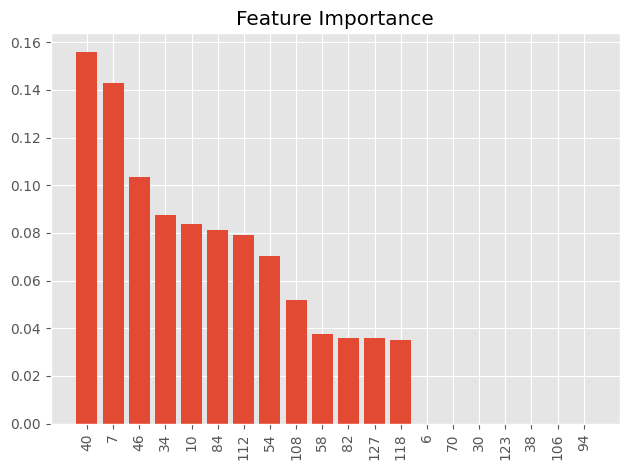

In [38]:
importances = clf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), df2.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [39]:
df2.columns[sorted_indices][0:10]

Index(['40', '7', '46', '34', '10', '84', '112', '54', '108', '58'], dtype='object')

In [40]:
importances[sorted_indices][0:10]

array([0.15590083, 0.14299378, 0.10324036, 0.08761843, 0.08375412,
       0.08103561, 0.07890961, 0.07026731, 0.051971  , 0.03766141])

In [41]:
import seaborn as sns

# sns.set(style="ticks", color_codes=True)
# g = sns.pairplot(df2)


import matplotlib.pyplot as plt
# plt.show()

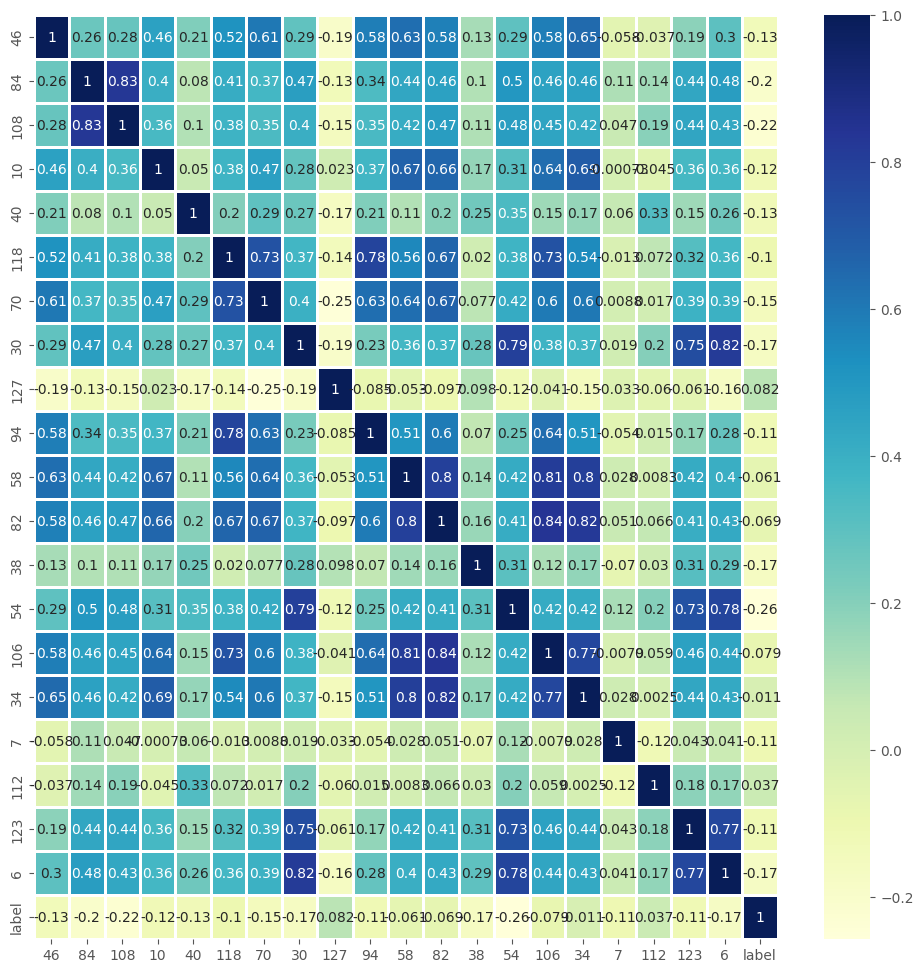

In [42]:
fig, ax = plt.subplots(figsize=(12,12))
dataplot = sns.heatmap(df2.corr(), cmap="YlGnBu", annot=True,linewidths=.8, ax=ax)
plt.show()

In [45]:
df3 = df2[['127','112','34','106','58','label']]

In [46]:
x = df3.drop("label", axis=1)
y = df3['label'].astype(int).values

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, shuffle=True)

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
#from sklearn.linear_model import LogisticRegression
clf = RandomForestClassifier(n_estimators=1000, max_depth=3)
#clf = LogisticRegression(random_state=0).fit(X_train, Y_train.ravel())
clf.fit(X_train, Y_train.ravel())
print("Accuracy on training set is : {}".format(clf.score(X_train, Y_train)))
print("Accuracy on test set is : {}".format(clf.score(X_test, Y_test)))
Y_test_pred = clf.predict(X_test)
print(classification_report(Y_test, Y_test_pred))

print(Y_test_pred)
print(Y_test)

Accuracy on training set is : 0.42063492063492064
Accuracy on test set is : 0.14814814814814814
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2
           4       0.18      0.60      0.27         5
           5       0.19      0.56      0.28         9
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         4

    accuracy                           0.15        54
   macro avg       0.03      0.09      0.04        54
weighted avg       0.05      0.15     

C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
misclassified = np.sum(cm) - np.sum(np.diag(cm))
print(cm)
print(misclassified)
print(classification_report(Y_test, y_pred))

[[0 0 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 3 0 0 0 0 0 0 0 0 0]
 [0 3 1 1 2 0 0 0 0 2 0 0 0 0]
 [0 2 0 0 2 0 1 0 0 0 0 0 0 0]
 [1 2 2 1 1 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 1 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 2 1 0 0 0 1 0 0 0 0]
 [0 2 1 1 0 0 0 0 0 0 0 0 0 0]]
51
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2
           4       0.20      0.20      0.20         5
           5       0.10      0.22      0.14         9
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         4
          11       0.

C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hjk0811\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hjk0811\anaconda3\env